In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
import torch
torch.cuda.get_device_name(), torch.cuda.is_available()

('NVIDIA GeForce RTX 4080', True)

In [2]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

In [3]:
import torch

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

MPS device not found.


In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/"images").ls()

(#7393) [Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [7]:
fname = (path/"images").ls()[0]
fname

Path('C:/Users/aksid/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [9]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(300),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

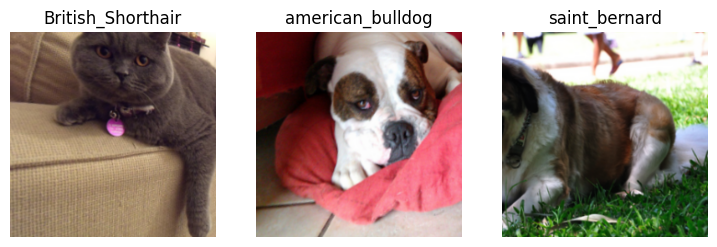

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\aksid\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\aksid\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.516265,0.335403,0.108931,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.504578,0.306780,0.099459,00:34
1,0.331629,0.223156,0.065629,00:35


# loss functions

In [13]:
x, y = dls.one_batch()
y

TensorCategory([ 5, 33,  2, 21, 21, 31, 11, 18,  2, 34,  0, 31, 13,  1,  6, 17,
                23,  4, 30, 15, 28, 17, 30, 34,  8, 15,  1, 34, 15, 22,  8, 35,
                35, 30, 33,  5,  5,  9,  0, 22, 35,  7, 14, 28, 13,  4, 31,  8,
                 0, 17, 20, 25, 10, 23, 16,  0,  3, 28, 24, 33,  4, 27, 26,  9],
               device='cuda:0')

In [14]:
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.7311e-05, 1.2323e-02, 7.0205e-07, 2.6817e-06, 5.2252e-03, 9.8103e-01,
        2.5945e-04, 6.2054e-04, 2.4861e-05, 4.1941e-04, 9.7156e-07, 8.3629e-06,
        2.3297e-06, 1.3739e-06, 5.7550e-07, 1.8805e-06, 1.2583e-05, 3.5906e-07,
        4.0930e-07, 1.0213e-05, 1.1304e-05, 9.4847e-08, 2.1636e-07, 8.8595e-06,
        1.3978e-06, 1.4254e-07, 1.1767e-06, 8.6316e-07, 7.1950e-07, 4.7327e-06,
        2.1483e-07, 1.4956e-06, 7.3691e-07, 6.1532e-07, 4.9350e-07, 1.0368e-06,
        2.2399e-07])

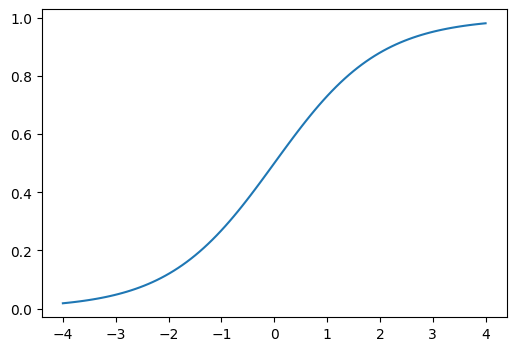

In [15]:
plot_function(sigmoid, min=-4, max=4)

In [16]:
acts = torch.randn((6, 2)) * 2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [17]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [18]:
acts.relu()

tensor([[0.0000, 1.2929],
        [0.0000, 0.0000],
        [0.0000, 1.2582],
        [1.1777, 2.5570],
        [0.0000, 0.0000],
        [2.2148, 0.0000]])

In [19]:
(acts[:,0]-acts[:,1]).sigmoid() # 입력이 7이 아닌 3이라고 확신할 수 있는 정도

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

다중 범주를 다룬 곰 분류에 사용한 신경망에서는 범주당 활성 하나를 반환한다.

In [20]:
# def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [21]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts # 정확하게 범주 1의 확률에서 범주 2의 확률을 뺀 것과 같다.

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [22]:
sm_acts.sum() # 전부 다 더하면 1 * 6이 된다.

tensor(6.)

소프트맥스는 시그모이드의 다중 범주 버전쯤으로 볼 수 있다. 범주가 둘 이상이고 각 범주 확률의 합이 1이 되어야 하는 상황에서는 언제나 사용할 수 있다. 그리고 단지 두 범주만 있을 때도 일관성을 유지할 목적으로 많이 사용한다.
모든 활성값이 0~1 사이이며 합하면 1이 되는 특성이 있는 함수를 직접 만들 수도 있지만 부드럽고 대칭적인 모양의 시그모이드 같은 함수를 만들기는 쉽지 않다. 또한 소프트맥스는 다음 절에서 다룰 손실함수와도 함께 잘 작동한다.

소프트맥스 함수가 정말로 하려는 일은 범주들 가운데 하나를 고르는 것이다. 따라서 각 입력에 레이블이 단 하나인 데이터를 분류하는 모델을 학습시키는 데 이상적이다. (추론 중에는 덜 이상적일 수 있다. 학습 시 인지하지 못한 범주를 만났을 때, 모델이 그 사실을 알려주길 원할지도 모르기 때문이다. 이때는 각 출력 활성에 시그모이드 함수를 적용하는 다중이진 출력 행을 사용하는 모델을 학습시키는 편이 더 나을 수도 있다.)

교차 엔트로피 손실은 두 부분으로 구성됨. 첫번째는 소프트맥스이고 두번째는 로그 가능도이다.

In [23]:
def mnist_loss(inputs, targets):
    """
    4장에서 다룬 mnist 손실함수를 사용했다.
    시그모이드에서 소프트맥스로 변경해서 손실함수도 이진 분류 이상에서 작동하는 형태로 확장해야함.
    즉 범주의 개수와 무관하게 분류할 수 있어야 함.
    
    소프트맥스를 거친 예측 배치에 속한 활성의 값은 0~1 사이이며 모두 더하면 1이다. 그리고 target값은 0과 36 사이의 정수이다. (활성값은 확률, target값은 범주로 생각할 수 있다.)
    inputs, 1-inputs는 단지 이진적인 범주이다.
    """
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()

In [24]:
targ = tensor([0, 1, 0, 1, 1, 0]) # 인위적으로 만든 숫자 3과 7의 레이블이 다음과 같다고 가정하자.

In [25]:
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [26]:
idx = range(6)
sm_acts[idx, targ] # 텐서의 색인 기능을 사용해 targ의 각 요소에 대해 sm_acts의 적절한 열을 선택할 수 있다.

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

올바른 레이블에 대응하는 손실만 선택하고 나머지는 신경 쓰지 않아도 됨. 소프트맥스의 정의에 따르면, 그 외의 열에 때한 활성을 모두 더한 값은 1에서 올바른 레이블의 활성을 뺸 값이기 때문이다.
따라서 올바른 레이블의 활성을 최대한 높게 만들면 그 외의 열에 대한 활성은 감소한다.

pytorch는 sm_acts[idx, targ]와 정확히 같을 일을 하는 `nll_loss` 함수를 제공한다. (nll은 음의 로그 가능도(negative log likelihood)의 약자이다.)

In [27]:
(-sm_acts[idx, targ]).mean(), F.nll_loss(sm_acts[idx], targ)

(tensor(-0.4941), tensor(-0.4941))

In [28]:
F.nll_loss(sm_acts[idx], targ, reduction='none'), -sm_acts[idx, targ]

(tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867]),
 tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867]))

로그를 취하는 이유는 일반적인 방법으로는 0.99와 0.999를 잘 구별하지 못하기 때문이며, 다른 시각에서 보자면 들의 차이는 10배 정도가 나기 때문이다.
이를 해결하려면 0~1 사이의 값을 음의 무한대와 양의 무한대로 변환해야한다. 그래야 차이가 극명하게 갈리기 때문이다.

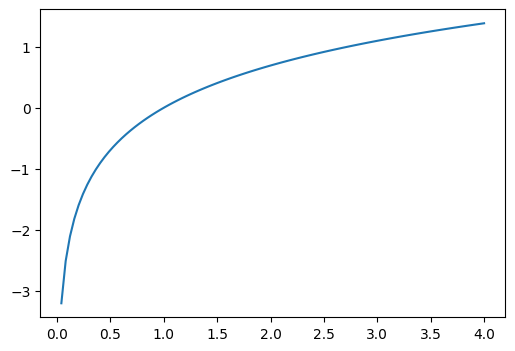

In [29]:
plot_function(torch.log, min=0, max=4)

로그의 기본성질에 따르면 기본이 되는 신호가 곱셈 또는 지수적으로 증가할 때 로그가 선형적으로 증가한다는 의미가 있다.
정말 크거나 작은 숫자를 만들 수 있는 곱셈을 덧셈으로 대체하여 컴퓨터가 다루기 쉬운 척도로 변환해주기 때문이다.
(물리학을 포함한 다양한 분야에서 매우 크거나 작은 숫자를 곱하는 데 로그를 사용한다.)

확률의 양 또는 음의 로그 평균으로 (범주가 올바른지 잘못됐는지에 따라) 음의 로그 가능도 얻을 수 있다.
파이토치의 nll_loss 함수는 이미 소프트맥스에 로그가 적용됐다고 가정한다. 따라서 로그를 적용하는 과정은 포함하지 않는다.

nll_loss의 'nll'은 음의 로그 가능을 의미하지만, 실제로는 로그를 전혀 사용하지 않는다. 이미 로그가 적용됐다고 가정한다.
파이토치에는 빠르고 정확한 방식으로 log와 softmax를 결합하는 함수인 log_softmax 함수가 있다. 
**nll_loss는 log_softmax 이후에 사용하도록 설계됐다.**

소프트맥스 다음에 로그 가능도를 적용하는 조합을 엔트로피 손실이라고 한다.
파이토치에는 nn.CrossEntropyLoss(실제로는 log_softmax 다음에 nll_loss를 수행함)로 교차 엔트로피 손실을 사용할 수 있다.

In [30]:
loss_func = nn.CrossEntropyLoss()

In [31]:
loss_func(acts, targ)

tensor(1.4743)

In [32]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([4.0573, 0.0677, 2.6122, 0.2245, 1.8704, 0.0134])

이제 손실 함수 뒤편의 숨겨진 조각을 모두 살펴 봤다. 그러나 손실은 모델이 학습을 잘하고 있는지를 나타내는 숫자를 부여할 뿐,
이 정보만으로는 모델의 좋고 나쁨을 파악할 수 없다. 그러면 이번에는 모델의 예측을 해석하는 몇 가지 방법을 알아보자.

## 모델 해석

사람이 손실 함수를 즉시 해석하기란 매우 어렵다. 왜냐하면 사람이 보려고 만든 것이 아니라 컴퓨터가 미분을 구하고 최적화 할 수 있도록 설계 됐기 때문이다.
그렇기 때문에 사람을 위해서라도 손실외에 또 다른 평가지표가 필요한 이유이기도 하다.
평가지표는 최적화에 사용되지 않고 단지 무슨일이 일어나는지 사람이 이해하도록 돕는 데 사용된다. 여기서는 평가지표로 정확도를 사용했다.
정확도를 보고 모델이 꽤 잘 학습됐다고 판단할 수 있었다. 하지만 모델이 어느 부분에서 실수 했는지도 알 수 있을까?

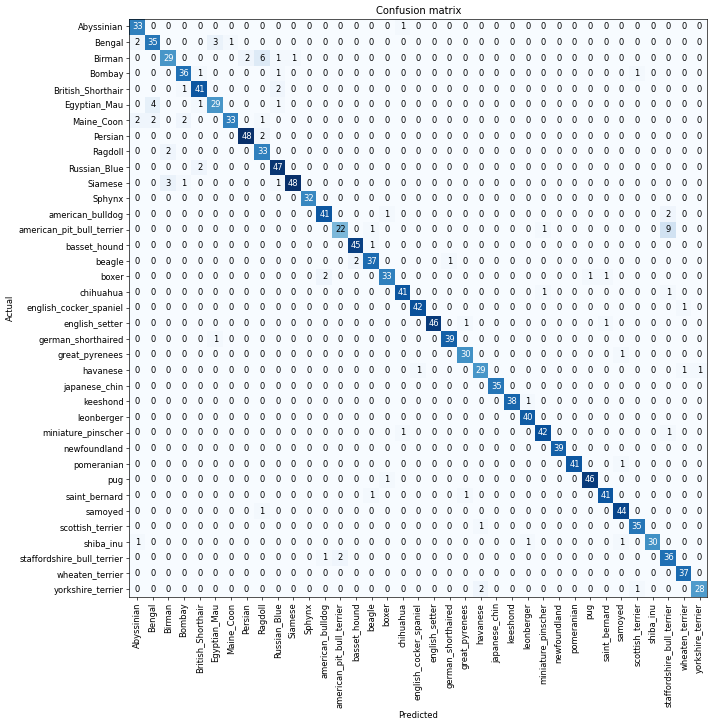

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [34]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Birman', 'Ragdoll', 6)]

## 모델 향상하기

이번에는 모델의 학습 능력을 개선하고 성능을 높이는 다양한 기법을 살펴보자. 이 과정에서 전이 학습을 좀 더 설명하고 사전 학습된 모델의 가중치를 무너뜨리지 않으면서 최대한 미세 조정하는 방법을 다루자.
모델 학습에서는 학습률을 가장 먼저 설정해야함. 앞 장에서 학습률을 적절히 설정해야 학습이 더 효율적으로 이루어짐을 배웠다. 그러면 좋은 학습률은 어떻게 고를 수 있을까?

모델의 학습에서 올바른 학습률을 고르는 일은 굉장히 중요하다. 학습률이 너무 낮으면 에포크가 많이 소요될 수 있다. 시간이 낭비될 뿐만 아니라 과적합 문제도 발생할 수 있다.
즉 모델이 전체 데이터를 반복해서 볼 기회를 많이 제공하므로 데이터를 기억할 기회가 더 생긴다.
그러면 학습률을 정말 높게 설정하면 될까? 높은 학습률이 어떤 결과를 초래하는지 확인해 보자.

In [35]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.430268,11.427735,0.665765,00:33


epoch,train_loss,valid_loss,error_rate,time
0,3.701123,2.184508,0.632612,00:35


옵티마이저는 올바른 방향으로 나아갔지만, 너무 많이 움직여서 최소 손실 지점을 완전히 비껴나갔다. 이를 여러번 반복하면 점점 더 최소 지점에 가까워지는게 아니라 더욱더 멀어진다.

너무 크지도, 작지도 않은 완벽한 학습률을 찾는데 2015년 레즐리 스미스는 `학습률 발견자`라는 훌륭한 아이디어를 떠올렸다. 다루기 크다는 생각이 전혀 들지 않을 만큼 매우 작은 학습률부터 사용하자는 아이디어이다.
미니배치 하나에 선택된 학습률을 사용하고 손실을 측정한다. 그리고 특정 비율로 학습률을 늘린다. (예: 매번 두 배로 늘림) 그리고 다음 미니배치에서 증가된 학습률을 적용하고 손실을 측정한다. 그다음 학습률을 또다시 늘린다. 손실이 나빠지기 직전까지 이를 반복한다. 그러면 너무 많은 움직임을 만들어낸 지점을 알아낼 수 있고, 우리는 그 지점보다 약간 작은 학습률을 선택하면 된다. 일반적으로 다음 둘 중 한 규칙으로 학습률을 선택하기를 권장한다.

* 최소 손실이 발생한 지점보다 한자리 작은 학습률 (예: 최소 손실이 발생한 학습률을 10으로 나눈 값)
* 손실이 명확히 감소하는 마지막 지점

학습률 발견자는 곡선의 점들을 계산하여 여러분들의 판단에 도움을 준다.
보통 앞의 두 규칙 모두 비슷한 학습률을 제안한다. 1장에서는 학습률을 지정하지 않고 fastai가 제시하는 디폴트값(1e-3)을 사용했다.

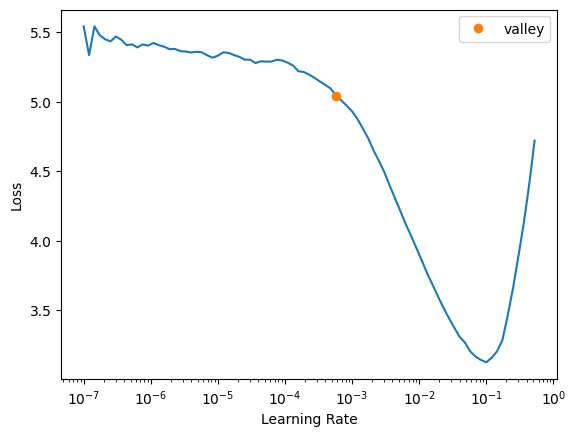

In [36]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr = learn.lr_find()

In [37]:
# print(f"Minimum/10: {lr}, steepest point: {lr}")
lr.valley

0.0005754399462603033

In [38]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=lr.valley)

epoch,train_loss,valid_loss,error_rate,time
0,2.602388,0.537428,0.167118,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.746025,0.265588,0.087957,00:35
1,0.519243,0.238239,0.079161,00:35


그래프의 1e-6과 1e-3 구간에서는 별다른 사건이 발생하지 않는다. 즉 학습이 이뤄졌다고 보기는 힘들다. 그다음에는 손실이 최하점에 도달할 때까지 감소가 계속되다가 최하점 이후에는 다시 증가한다. 
학습을 이탈시킬 가능성이 높은 1e-1보다 큰 학습률은 바람직하지 않는다. 그리고 1e-1은 이미 상당히 큰 값이다. 손실이 꾸준히 감소하는 구간을 이미 자나갔다.

앞의 학습률 도표를 보면 3e-3 부근의 학습률이 적당해보인다. 이 값으로 학습을 시도해 보자. 

이제는 합성곱 신경망이 여러 선형 계층과 이들을 잇는 비선형 계층의 조합과 그 끝에는 하나 이상의 선형 계층이 위치하며, 가장 마지막 선형계층에는 소프트맥스 같은 활성화 함수가 쓰인다는 것을 알 것이다. 그리고 마지막 선형 게층은 모델이 분류하는 범주의 개수와 열의 크기가 같은 행렬을 사용한다. (분류 문제라고 가정함.)

마지막 선형 계층이 전이 학습의 미세 조정에 사용될 가능성은 낮다. 사전학습된 원본 데이터셋이 특정한 범주를 분류하도록 디자인 되었기 때문이다. 따라서 전이 학습에서는 이 계층을 모델 구조에서 제거하고 새로운 문제에 맞는 출력 개수로 구성한 새로운 선형 계층으로 교체해야만 한다. (여기서 품종이 37개이므로 활성 37개로 구성한다.) 

새로 추가된 선형 계층의 가중치는 완전히 임의로 지정된다. 그렇기 때문에 미세 조정 전까지 모델은 완전히 임의의 출력을 한다. 하지만 모델 자체가 완전히 임의적이라는 뜻이 아니다.

마지막 계층 이전의 모든 계층은 일반적인 이미지 분류 작업을 잘 해내도록 신중히 학습 됐기 때문이다. 1장에서 본 논문에 수록된 이미지를 떠올려 보자. 처음 게층 몇개는 음영, 모서리 같은 일반적인 개념을 인코딩 했으며 이후 게층들 또한 특정 상호아에 구체적이긴 하지만 털, 안구같이 여전히 우리가 다루는 문제에 유용한 개념을 인코딩 했다.

이렇게 사전 학습된 모델의 유용한 개념을 모두 기억한 채 새로운 문제를 해결할 모델을 학습 시킨다면 가장 바람직할 것이다. 즉 새로운 문제에 특화된 일부만을 조정하는 방식이다. 

미세 조정 문제는 신중하게 사전 학습된 가중치를 망가뜨리지 않으면서, 추가된 선형 계층의 임의 가중치를 새로운 작업을 올바르게 푸는 가중치로 바꾸는 작업이다. 간단한 기법으로 이를 가능케 할 수 있다. 옵티마이저는 추가된 계층의 임의 가중치만 갱신하고, 그 외의 가중치는 전혀 바꾸지 않도록 강제할 수 있다. 이를 사전 학습된 계층을 동결 시키는 기법이라고 한다.

사전 학습된 신경망으로 모델을 만들때, fastai는 자동으로 사전 학습된 모든 계층을 동결 시킨다. 그리고 fine_tune 메서드를 호출하면 다음 두 작업을 수행한다.

* 한 에포크 동안 추가된 계층의 임의 가중치만 갱신(학습) 한다. 그 외의 계층은 동결 상태를 유지한다.
* 그 다음 모든 계층의 동결을 해제하고 요청된 에포크 수 만큼 학습을 진행한다.

이는 적당한 기본 접근법이지만, 데이터셋의 특성에 따라 약간씩 변화를 주면 더 좋은 결과를 얻을 수 있다. fine_tune 메서드 자체가 일부 행동에 변화를 주는 인자를 제공하지만, 완전한 사용자 정의 행동을 얻으려면 내부적으로 실제 호출되는 메서드를 직접 사용하는 편이 가장 명확하고 쉽다.

그러면 fine_tune이 하는 일을 직접 해보도록 해보자. 우선 fit_one_cycle 메서드로 추가된 계층에 대해 세번의 에포크 동안 학습을 수행한다. 1장에서 언급한 대로 fit_one_cycle은 fine_tune_을 사용하지 않는 상황에서 모델 학습에 권장되는 메서드이다. fit_one_cycle에서는 전체 학습을 두 부분으로 나눈다. 우선 낮은 학습률로 학습을 시작하여 첫번째 부분까지 점진적으로 학습률을 증가시키고 두번째 부분에서는 다시 점진적으로 학습률을 감소시킨다.

In [39]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.131480,0.348311,0.104871,00:34
1,0.542458,0.277036,0.085250,00:34
2,0.330448,0.233031,0.071042,00:34


In [40]:
learn.unfreeze()

SuggestedLRs(valley=3.0199516913853586e-05)

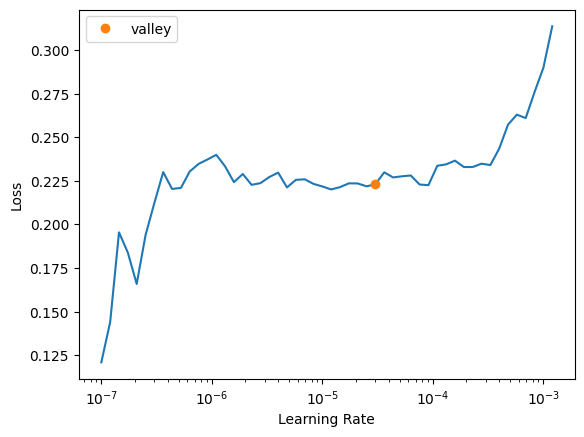

In [41]:
learn.lr_find()

In [42]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.239241,0.231788,0.072395,00:35
1,0.244474,0.223328,0.071719,00:35
2,0.220515,0.224200,0.073072,00:35
3,0.191329,0.209536,0.066982,00:34
4,0.176683,0.213515,0.065629,00:34
5,0.166841,0.214509,0.064276,00:34


모델이 학습중임을 가리키는 가파른 절벽이 없다. 모델이 이미 학습됐기 떄문이다. 가파르게 상승하는 지점 이전에 어느 정도 평평한 부분이 있다. 즉 적어도 가파르게 상승하는 지점 이전의 어느 부분을 선택해야만 한다.
가력 1e-5와 같은 값을 말이다. 여기서는 그레이디언트가 최대인 지점을 찾는 것이 목적이 아니므로 그 부분은 무시해야한다.
아무튼 적당한 학습률을 사용해 학습을 시도하면 모델을 약간 개선할 수 있다. 그러나 더 개선할 수도 있다. 사전 학습된 모델의 가장 심층부에는 마지막에 추가된 계층 정도로 높은 학습률이 필요 없을지도 모른다. 즉 서로 다른 계층에 서로 다른 학습률을 사용해야 할 가능성이 높다는 말이다. 이렇게 계층마다 다른 학습률을 적용하는 방식을 차별적 학습률이라고 한다.

## 차별적 학습률

동결 해제 후에도 사전 학습에서 형성된 가중치의 품질에 주의를 깊게 기울여야 한다. 사전 학습된 파라미터를 위한 최적의 학습률이 임의로 추가도니 파라미터 학습에서만큼 크다고 생각해선 안된다. 이는 임의로 추가된 파라미터를 수 에포크 동안 조정한 후에도 마찬가지이다. 사전 학습된 가중치들은 수백번 이상의 에포크 동안 수백만장의 이미지로 학습ㅇ해서 얻었음을 기억하자.

1장에서 각 계층이 학습한 내용을 시각적으로 보여준 이미지를 기억하는가? 첫번째 계층은 모서리, 그레이디언트와 같은 매우 기초적인 특징을 학습한 모습을 모여줬다. 이런 특징은 거의 모든 작업에서 유용하다. 그리고 '눈', '노을빛' 처럼 더 복잡한 개념을 학습한 이후의 계층들은 다른 작업에서는 전혀 도움이 되지 않을 수도 있다. 따라서 초기보다 후기 계층을 더 빠르게 미세조정하는 편이 타당하다.

이런 이유로 fastai에서는 차별적 학습률의 사용을 기본 접근법으로 채택한다. 이 기법은 NLP 분야의 전이 학습을 다룬 ULMFiT에서 개발된 접근법이다. 딥러닝의 여러 개념과 마찬가지로, 신경망의 초기 계층에는 작은 학습률을 사용하고 후기계층(특히 임의의 가중치로 추가된 계층을 포함함)에는 높은 학습률을 사용한다는 매우 단순한 기법이다. 교재 이미지처럼 신경망의 서로 다른 계층들은 서로 다른 속도로 학습돼야 한다는 전이학습 개념의 통찰에 기반한다. 이 개념은 2014년에 개발 됐다.

fastai는 학습률을 지정할 수 있는 모든 곳에서 파이썬의 slice 객체를 수용한다. slice 객체에 명시된 첫 번째 값은 신경망의 가장 초기 계층의 학습률이며, 두번째 값은 최종 계층의 학습률이다. 그리고 두 계층 사이의 계층들은 정해진 범위에서 일정한 크기로 곱한 학습률을 할당받는다. 직전에 수행한 학습에 이 접근법을 그대로 적용해보자. 가장 초기 계층은 학습률을 1e-6으로 설정하고, 다른 계층들은 1e-6에서 1e-4까지 일정하게 증가하여 설정한다. 잠시 학습한 뒤 어떤 일이 벌어지는지 살펴보자.

In [43]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.158871,0.358744,0.110961,00:33
1,0.537270,0.242421,0.072395,00:34
2,0.325229,0.214950,0.064276,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.260439,0.208798,0.058187,00:34
1,0.249025,0.205583,0.063599,00:35
2,0.246512,0.197505,0.060217,00:35
3,0.221673,0.202237,0.056157,00:34
4,0.193067,0.194547,0.062246,00:33
5,0.178457,0.185078,0.060893,00:33
6,0.161873,0.186135,0.054804,00:34
7,0.143717,0.176343,0.056834,00:33
8,0.141193,0.184336,0.054804,00:33
9,0.134029,0.179677,0.056157,00:33


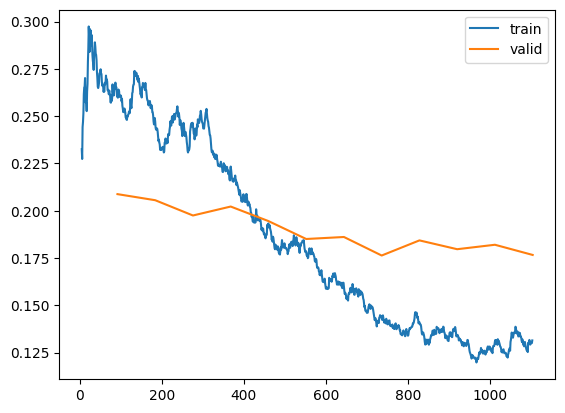

In [44]:
learn.recorder.plot_loss()

보다시피 학습용 데이터셋 손실이 계속해서 나아지는 모습이다. 그러나 검증용 데이터셋 손실의 개선은 매우 더딘편이며, 여기서는 나타나지 않았지만 때로는 나빠지는 모습을 보이기도 한다. 바로 여기가 과적합이 발생하는 지점이다. 모델이 예측에 과한 자신감을 가진다. 하지만 반드시 정확도가 떨어진다는 의미는 *아니다.* 에포크별 학습 결과에 따르면, 검증용 데이터셋 손실이 나빠지더라도 정확도는 계속해서 증가함을 알 수 있다. 궁극적으로 우리가 알고 싶은것은 손실이 아니라, 비지니스 목적에 알맞게 고른 평가 지표여야 한다. 손실은 단지 컴퓨터가 최적화해야 하는 함수이다.

모델을 학습시킬 때는 학습을 얼마나 오래 진행할지도 결정해야 한다. 바로 이어서 살펴보자

## 에포크 횟수 선택하기

최종 에포크에서도 여전히 모델이 개선될 여지가 있다면, 학습 시간이 충분하지 않았다는 의미이다. 한편 학습 종반에 선택한 평가지표가 나빠지는 상황을 목격할지도 모른다. 검증용 데이터셋 손실뿐만 아니라 실제 평가지표가 나빠지는지도 관찰해야 함을 명심하자. 모델의 자신감이 과해지는 순간 검증용 데이터셋 손실이 나빠지기 시작하며, 데이터를 올바르지 않게 기억해서 더 나빠진다. 그런데 우리는 이 중 두번째 상황만 걱정하면 된다. 손실 함수는 옵티마이저가 미분과 최적화에 사용하는 것이지, 실제로 우리가 관심을 가져야 할 부분이 아니다.

원사이클 학습 방법이 개발되기 전에 보통 에포크마다 모델을 저장하고 저장된 모델 중 정확도가 가장 높은 모델을 선택했다. 이런 방법을 조기 종료라고 한다. 그러나 중간 어디쯤의 에포크에서 선택한 모델은 최고의 결과를 찾는 학습률에 도달하기 전에 발견됐을지도 모른다. 즉 최고의 모델을 얻을 가능성이 낮다. 그래서 과적합을 발견했다면 모델 전체를 처음부터 다시 학습시켜야만 하며, 이번에는 이전에 발견된 최선의 결과에 기반하여 에포크의 횟수를 골라야만 한다. 많은 에포크 동안 학습을 진행할 시간이 충분하다면, 더 많은 파라미터 학습에 시간을 투자하는 편이 현명할지도 모른다. 즉, 더 깊은 구조의 모델을 사용하자는 말이다.

## 더 깊은 구조

일반적으로 파라미터가 더 많은 모델은 데이터를 더 정확하게 모델링 할 수 있다.(이를 일반화하는 데는 여러 주의 사항이 있으며 사용하는 구조의 세부 사항에 따라 차이가 있습니다. 하지만 현재로서는 합리적인 경험적 법칙입니다.) 이책에서 볼 몯레 구조 대부분에 단순한 계층을 더 많이 추가해서 더 큰 모델을 만들 수도 있다. 그러나 사전 학습된 모델을 활용할 때는 사전 학습된 계층 수가 곧 여러분이 사용할 모델의 크기를 결정한다.

실전에서 모델의 구조가 다양하지 않는 이유이다. 가령 5장에서 사용한 ResNet 구조는 18, 34, 50, 101, 152개의 계층으로 구성된 버전들로 제공되며, 모두 이미지넷으로 사전 학습되었다. 구조가 더 큰 ResNet은 항상 더 나은 학습 손실을 얻게 한다. 그러나 과적합될 파라미터가 더 많으므로 과적합 문제에 빠질 가능성이 더 높다.

일반적으로 구조가 더 큰 모델은 데이터의 실제 관계를 더 잘 포착한다. 또한 개별 이미지에 특화된 세부 사항을 포착하고 기억하는 능력도 더 뛰어나다.

그러나 더 심층적인 구조의 모델은 GPU 메모리를 더 많이 요구하므로 메모리 부족 오류를 피하려면 배치 크기를 줄여줘야 한다. 보유한 GPU의 용량을 초과하는 너무 많은 데이터를 한 번에 학습시킬 때 발생하는데, 보통 다음과 같은 오류 메세지를 출력한다.

> Cuda runtime error: out of memory

이 문제가 발생하면 더 작은 배치 크기를 사용해야만 문제를 해결할 수 있다. 즉 모델에 한 번에 전달하는 이미지 개수를 줄여야 한다. DataLoaders를 만들 때 bs= 인잣값을 활용하면 원하는 배치 크기를 설정할 수 있다.

더 큰 구조의 모델을 사용하면 학습에 시간이 오래 소요된다는 단점도 있다. 속도를 끌어올리는 기법 중에는 혼합 정밀도 학습이 있다. 이는 학습 시 가능한 한 덜 정밀한 숫자를 사용함을 의미한다. 2020년 초 현재 거의 모든 Nvidia GPU가 신경망 학습을 2~3배 가량 빠르게 해주는 텐서코어라는 특별한 기능을 지원한다. 훨씬 적은 GPU 메모리를 요구하기도 한다. fastai에서 이 기능을 활성화 하려면 생성한 Learner에 `to_fp16()` 메서드를 호출하면 된다. 이 메서드는 모델의 가중치와 일부 계산을 16비트 부동소수점으로 변환한다. 이는 모델의 크기를 절반으로 줄여준다. 또한 GPU 메모리 사용량을 절반으로 줄여준다. 이 기능은 1장에서 사용한 ResNet34 모델을 학습할 때도 사용했다. 이 기능을 사용하면 학습 속도가 2배 가량 빨라진다. 또한 GPU 메모리 사용량도 절반으로 줄어든다. 이 기능은 모든 모델에 적용할 수 있으며, 학습 속도를 높이고 GPU 메모리 사용량을 줄이는 데 도움이 된다.

여러분의 문제에 가장 적합한 모델 구조를 미리 알 수는 없다. 어느정도 학습을 진행해야만 알아낼 수 있다. 따라서 다음처럼 혼합 정밀도를 사용한 ResNet-50 모델을 시도해 보자.

In [45]:
from fastai.callback.fp16 import *

learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\aksid/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 56.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.261333,0.465754,0.140054,00:33
1,0.865231,0.346771,0.106901,00:33
2,0.594071,0.300337,0.098782,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.300675,0.240359,0.079161,00:34
1,0.251778,0.238446,0.073748,00:34
2,0.210845,0.223252,0.071042,00:34
3,0.134523,0.201486,0.060217,00:34
4,0.087980,0.196432,0.055480,00:34
5,0.069204,0.184205,0.054804,00:34
